In [42]:
import pandas as pd
df=pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [44]:
df.shape

(400, 5)

In [45]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [47]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int64
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int64(5)
memory usage: 15.8 KB


In [49]:
df.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.490000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,0.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


In [50]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [51]:
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

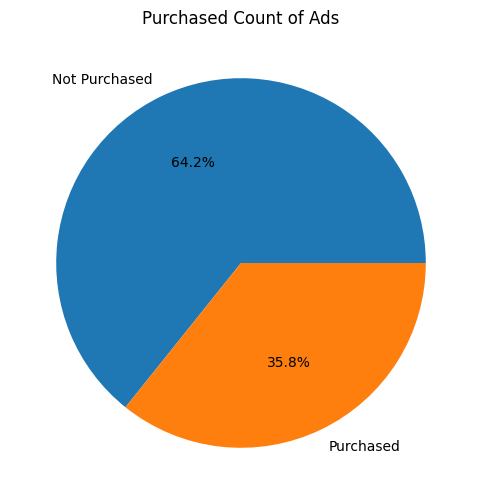

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
Purchased_counts = df['Purchased'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(Purchased_counts, labels=['Not Purchased', 'Purchased'],
        autopct='%1.1f%%')
plt.title('Purchased Count of Ads')
plt.show()

In [53]:
from imblearn.over_sampling import SMOTE
x=df.drop(columns="Purchased",axis=1)
y=df["Purchased"]
smote=SMOTE(sampling_strategy="minority")
x_sm,y_sm=smote.fit_resample(x,y)
print(x_sm.shape)
print(y_sm.shape)

(514, 4)
(514,)


In [54]:
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

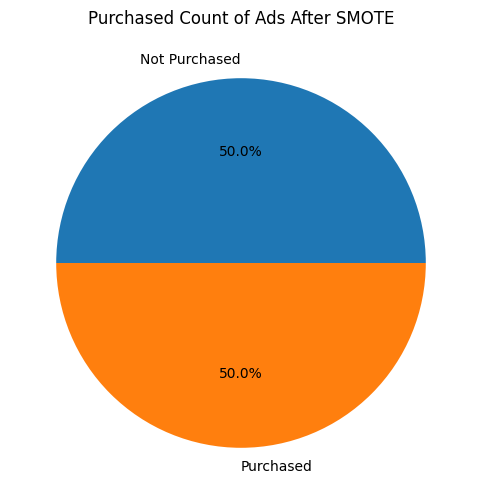

In [55]:
import matplotlib.pyplot as plt
from collections import Counter

# Count the resampled target values
Purchased_sm_counts = Counter(y_sm)

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(Purchased_sm_counts.values(), labels=['Not Purchased', 'Purchased'],
        autopct='%1.1f%%')
plt.title('Purchased Count of Ads After SMOTE')
plt.show()


In [56]:
x=df.drop(columns="Purchased",axis=1)
y=df["Purchased"]
x

,User ID,Gender,Age,EstimatedSalary
0,15624510,1,19,19000
1,15810944,1,35,20000
2,15668575,0,26,43000
3,15603246,0,27,57000
4,15804002,1,19,76000
...,...,...,...,...
395,15691863,0,46,41000
396,15706071,1,51,23000
397,15654296,0,50,20000
398,15755018,1,36,33000


In [57]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [58]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)
x

array([[-0.93657932,  1.02020406, -1.78179743, -1.49004624],
       [ 1.66838653,  1.02020406, -0.25358736, -1.46068138],
       [-0.32087714, -0.98019606, -1.11320552, -0.78528968],
       ...,
       [-0.52039175, -0.98019606,  1.17910958, -1.46068138],
       [ 0.88695546,  1.02020406, -0.15807423, -1.07893824],
       [-1.36231017, -0.98019606,  1.08359645, -0.99084367]],
      shape=(400, 4))

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)

[0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0
 0 0 0 0 1 0]


In [60]:
from sklearn.metrics import r2_score
r2s=r2_score(y_test,y_pred)
print(r2s)

from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
print(mae)

0.5604395604395604
0.1


In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)
model=LogisticRegression()
model.fit(x_test,y_test)
pred = model.predict(x_test)
print(y_pred)

[0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0
 0 0 0 0 1 0]


In [62]:
from sklearn.metrics import r2_score
r2s=r2_score(y_test,y_pred)
print(r2s)

from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
print(mae)

0.5604395604395604
0.1
